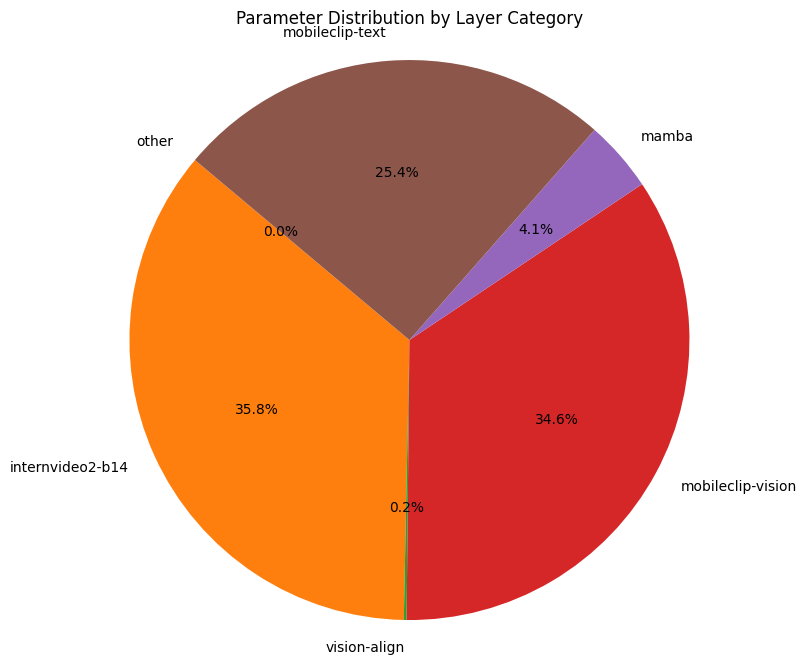

In [8]:
import torch
from collections import Counter
import matplotlib.pyplot as plt

# Define your filtering function
def filter_block(block: str):
    if block.startswith('vision_encoder'):
        return 'internvideo2-b14'

    if block.startswith('streaming_vision_encoder'):
        if 'vit_lite' in block:
            return 'mobileclip-vision'
        else:
            return 'mamba'

    if block.startswith('text_encoder'):
        return 'mobileclip-text'

    if block.startswith('vision_align'):
        return 'vision-align'

    return 'other'

# Load the checkpoint
ckpt = torch.load(
    'scripts/pretraining/clip/B14/B14/ckpt_iter0000100/mp_rank_00_model_states.pt',
    weights_only=False
)

# Extract the module (model state dictionary)
module = ckpt['module']

# Initialize a counter to track parameter counts per category
counter = Counter()

# Loop over each parameter in the model
for key in module:
    tensor = module[key]
    category = filter_block(key)
    counter[category] += tensor.numel()  # num of elements (parameters) in the tensor

# Compute total number of parameters
total = sum(counter.values())

# Prepare data for plotting
labels = counter.keys()
sizes = [(v / total) * 100 for v in counter.values()]

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensure the pie is a circle
plt.title("Parameter Distribution by Layer Category")
plt.show()

In [9]:
from tabulate import tabulate

headers = ['Model Section', '# Parameters']

counts = [[x[0], f"{x[1]:,}"] for x in list(counter.items())]

print(tabulate(counts, headers, tablefmt="fancy_grid"))

╒═══════════════════╤════════════════╕
│ Model Section     │ # Parameters   │
╞═══════════════════╪════════════════╡
│ other             │ 1              │
├───────────────────┼────────────────┤
│ internvideo2-b14  │ 89,438,976     │
├───────────────────┼────────────────┤
│ vision-align      │ 395,264        │
├───────────────────┼────────────────┤
│ mobileclip-vision │ 86,349,314     │
├───────────────────┼────────────────┤
│ mamba             │ 10,276,704     │
├───────────────────┼────────────────┤
│ mobileclip-text   │ 63,428,096     │
╘═══════════════════╧════════════════╛


In [5]:
list(counter.items())

[('other', 395265),
 ('internvideo2-b14', 89438976),
 ('mobileclip-vision', 86349314),
 ('mamba', 10276704),
 ('mobileclip-text', 63428096)]

In [6]:
import torch
tensor = torch.randn(1, 10)

In [7]:
tensor

tensor([[-0.1785,  0.2660,  0.7076,  1.2338, -0.5702,  0.9939, -0.3905,  0.3757,
         -1.1082,  0.4973]])

In [8]:
tensor.chunk(2, dim = -1)

(tensor([[-0.1785,  0.2660,  0.7076,  1.2338, -0.5702]]),
 tensor([[ 0.9939, -0.3905,  0.3757, -1.1082,  0.4973]]))

In [3]:
import os
from huggingface_hub import snapshot_download
snapshot_download(
    repo_id = "qingy2024/InternVideo2-B14",
    local_dir = "./",
    allow_patterns = ["*results*"], # Dynamic 1bit (168GB) Use "*UD-Q2_K_XL*" for Dynamic 2bit (251GB)
)

Fetching 21 files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 24.35it/s]


'/home/zli/StreamMamba/InternVideo2/multi_modality'